# Second-order optimization methods

### Newton’s method

***Implementation 1.1 Implement Newton’s method in its basic form (2). Your code should take f, ∇f and ∇2f as inputs.***

$$w_{k+1} = w_k - [\nabla^2 f(w_k)]^{-1}∇f(w_k)$$

In [24]:
import torch
from torch.autograd.functional import hessian
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class NewtonMethod(object):  
    '''
    Newton’s method is an optimization algorithm based on using the first- and second-order derivatives
    of the objective function. 
    '''    

    def __init__(self):  
        self.f = None

    def define_function(self,f):
        """
        Définition de la fonction à optimiser
        """
        self.f = f

    def compute_stepsize(self,previous_alpha):
        """
        Fonction de calcul du taux d'apprentissage
        """
        return 1

    def compute_gradient_hessian(self,w):
        """
        Calcul du gradient et la matrice hessienne
        """
        w = torch.tensor(w.detach().numpy(), requires_grad=True)
        y = self.f(w)
        y.backward()
        grad = w.grad
        H = hessian(self.f, w)        
        return grad, H

    
    def update_w(self,w,grad,H,alpha):
        """
        Mise à jour des poids w
        """
        return w - alpha*H.inverse().T@grad


    def run(self,w0,epsilon=1e-3, alpha0=1,nb_iterations = 200,
            convergence = "epsilon", verbose=True):
        """
        Lancement de l'algorithme
        convergence : choix du mode de convergence (espilon ou iterations)
        epsilon : critère de convergence
        nb_iterations : nombre d'itérations de l'algorithme      
        """
        k = 0
        w = w0
        alpha = alpha0
        w_values = []
        f_values = []
        while True:     
            grad, H = self.compute_gradient_hessian(w)

            alpha = self.compute_stepsize(alpha)
            w = self.update_w(w,grad,H,alpha)

            w_values.append(w.detach().numpy())
            f_values.append(self.f(w).detach().numpy())

            if convergence == "epsilon":
              if torch.linalg.norm(grad) < epsilon:
                if verbose:
                    print(f"Convergence en {k} iterations")
                break
            if k > nb_iterations:
                if verbose:
                    print(f"Arrêt à {k} iterations")
                break
            
            k += 1
        return w_values,f_values

***Question 1.1 a) Write down the first iteration of Newton’s method for problem (3), and show that Newton’s
method indeed converges in one iteration to the solution.***

La fonction objectif est :
$q(w) = 2(w_1+w_2+w_3)^2+(w_1-w_2)^2 + (w_2-w-3)^2$

Le gradient et la matrice hessienne sont alors :
$∇q(w) = \begin{pmatrix}
6 & 2 & 4\\
2 & 8 & 2\\
4 & 2 & 6\\
\end{pmatrix} \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}-12\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}$

$H(w) = \begin{pmatrix}
6 & 2 & 4\\
2 & 8 & 2\\
4 & 2 & 6\\
\end{pmatrix}$ \\
L'inverse de la matrice hessienne existe toujours et vaut :

$H^{-1}(w) = \frac{1}{36}\begin{pmatrix}
11 & -1 & -7\\
-1 & 5 & -1\\
-7 & 2 & 11\\
\end{pmatrix}$

Une itération de mise à jour des poids avec Newton est :

$w_{k+1} = w_k - H^{-1}(w_k)∇q(w_k) = w_k - H^{-1}H w_k+12H^{-1}\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}$

$w_{k+1} = 0 - \frac{1}{3}\begin{pmatrix}
11 & -1 & -7\\
-1 & 5 & -1\\
-7 & 2 & 11\\
\end{pmatrix}\begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix} = \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}$

On remarque que l'on converge bien en une itération, quelque soit le point d'initialisation choisi.

Nous avons choisi $|∇f| < \epsilon$ où $\epsilon = 10^{-3}$ comme critère de convergence. Le nombre d'itération est limité à 100. $w_0$ est généré aléatoirement.

In [25]:
newton = NewtonMethod()

def f(x):
  return 2*(x[0]+x[1]+x[2]-3)**2 + (x[0] - x[1])**2 + (x[1]-x[2])**2

newton.define_function(f)

w0 = torch.tensor(np.random.rand(3))
w_values, f_values = newton.run(w0,alpha0=1,nb_iterations = 100,convergence="epsilon")
print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])

Convergence en 1 iterations
argmin(f) =  [1. 1. 1.]
min(f) =  3.944304526105059e-31


On observe que la méthode de Newton a effectivement convergé en 1 itération.
En effet, la fonction est un polynôme homogène de degré 2 en $w$. Il s'agit d'une fonction quadratique strictement convexe. On a donc une convergence en 1 itération avec la méthode de Newton.

***Question 1.1 b) Run the method starting from the origin and two other starting points of your choice. Do you
indeed observe convergence in one iteration?***

In [26]:
import math
#Origine
w01 = torch.tensor(np.zeros(3), requires_grad=True)

#Autres points d'initialisation
w02 = torch.tensor(np.array([10.1,25,58]))
w03 = torch.tensor(np.array([np.exp(6),math.pi,-54]), requires_grad=True)

w0_list = [w01,w02,w03]
for w0 in w0_list:
  print("Initialisation à ", w0)
  w_values, f_values = newton.run(w0,alpha0=1,nb_iterations = 100,convergence="epsilon")
  print("argmin(f) = ", w_values[-1])
  print("min(f) = ",f_values[-1])
  print("----------------------------")

Initialisation à  tensor([0., 0., 0.], dtype=torch.float64, requires_grad=True)
Convergence en 1 iterations
argmin(f) =  [1. 1. 1.]
min(f) =  0.0
----------------------------
Initialisation à  tensor([10.1000, 25.0000, 58.0000], dtype=torch.float64)
Convergence en 1 iterations
argmin(f) =  [1. 1. 1.]
min(f) =  0.0
----------------------------
Initialisation à  tensor([403.4288,   3.1416, -54.0000], dtype=torch.float64, requires_grad=True)
Convergence en 1 iterations
argmin(f) =  [1. 1. 1.]
min(f) =  0.0
----------------------------


On remarque que la méthode de Newton converge en 1 itération indépendamment du point d'initialisation car la fonction $f$ est strictement convexe.

***Question 1.2 We now consider the celebrated Rosenbrock function***

$$ \underset{w \in R²}{\text{minimize }} 100 (w_2 - w_1^2)^2 + (1-w_1)^2$$

***Question 1.2 a) Apply your implementation of Newton’s method to this problem starting from.
Report your results and your observations. Does the method converge?***

In [27]:
def f(x):
  # Rosenbrock function
  return 100*(x[1] - x[0]**2)**2 +(1 - x[0])**2 

newton.define_function(f)
w0 = torch.tensor(np.array([-1.2,1]), requires_grad=True)
w_values, f_values = newton.run(w0,alpha0=1,nb_iterations = 100,convergence="epsilon")
print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])

Convergence en 5 iterations
argmin(f) =  [1. 1.]
min(f) =  3.4326461875363225e-20


En partant de $w_0=[-1.2,1]$, On remarque que l'on converge en 5 itérations avec la méthode. Le critère de convergence étant toujours $|∇f| < \epsilon$ où $\epsilon = 10^{-3}$.

In [28]:
w0 = torch.tensor(np.array([0,1/200 + 10**-12]), requires_grad=True)
w_values, f_values = newton.run(w0,alpha0=1,nb_iterations = 200,convergence="epsilon")
print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])

Arrêt à 201 iterations
argmin(f) =  [-5.00998343e+09  2.50999340e+19]
min(f) =  2.509993402051205e+19


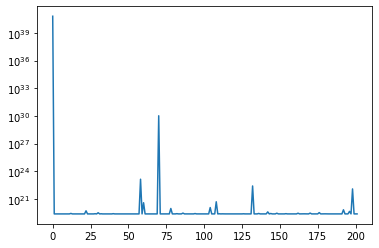

In [29]:
plt.plot(range(len(f_values)),f_values)
plt.yscale("log")

En partant de $w_0 = [0,\frac{1}{200} + 10^{-12}]$, la procédure atteint le budget de 200 itérations et s'arrête. La méthode de Newton ne semble pas convergé a priori. La condition de convergence $|∇f| < \epsilon$ où $\epsilon = 10^{-3}$ n'est pas satisfaite au bout de 200 itérations.

Il est possible d'expliquer ce phénomène en analysant la matrice hessienne à $w_0$

\begin{equation*}
H^f(w) = 
\begin{pmatrix}
-400(w_2-w_1^2)+800w_1^2+2 & -400w_1\\
-400w_1 & 200
\end{pmatrix}
\end{equation*}

La matrice hessienne en $w_0$ vaut :

\begin{equation*}
H^f(w_0) = 
\begin{pmatrix}
-\frac{1}{25\times 10^8} & 0\\
0 & 200  
\end{pmatrix}
\end{equation*}

Les valeurs propres sont ainsi 200 et $-\frac{1}{25\times 10^8}$. La matrice a une valeur propre strictement négative et une valeur propre strictement positive, il s'agit d'un point-col (car le gradient n'est pas nulle).
La méthode de Newton vise à annuler le gradient de la fonction sur laquelle on l'applique. Ainsi, comme $w_0$ est un point col recherché, les itérés convergent vers ce point col. La méthode de Newton va ainsi continuer à itérer sur des points au voisinage de ce point col sans pouvoir annuler le gradient.

De plus, l'une des valeurs propres est très proche de 0. On remaque que la matrice hessienne en $w_0$ est mal conditionnée car le rapport entre la plus grande et la plus petite valeur proche est important en valeur absolue.

***Question 1.2 b)  Could we run the method starting from the point $w_{03} = [0,\frac{1}{200}]$ ? How does that illustrate that
Newton’s method is local in nature?***

\begin{equation*}
H^f(w_0) = 
\begin{pmatrix}
0 & 0\\
0 & 200  
\end{pmatrix}
\end{equation*}

La matrice hessienne n'est plus inversible car une valeur propre est nulle. Le déterminant est donc nul. On ne peut donc pas appliquer la méthode de Newton car $H^{-1}$ n'est pas défini.

In [30]:
# w0 = torch.tensor(np.array([0.0,1/200]), requires_grad=True)
# w_values, f_values = newton.run(w0,alpha0=1,nb_iterations = 200,convergence="epsilon")
# print("argmin(f) = ", w_values[-1])
# print("min(f) = ",f_values[-1])

Les caractéristiques définissant la convergence de la méthode de Newton dépendent ainsi fortement du point d'initialisation, il s'agit d'une méthode d'optimisation locale. 

### A globally convergent version of Newton’s method

***Implementation 1.2 Implement the globalized version of Newton’s method using the direction
choice (5)– (6) and the Armijo line-search procedure from Definition 1.1.***




$$d_k = -[∇²f(w_k)+λ_kI]^{-1}∇f(w_k)$$
where $λ_k = 2max\{-λ_{min}(∇^2f(w_k)),0\}$

In [31]:
class GlobalConvergentNewton(NewtonMethod):
      def compute_direction(self,w,grad,H):
        #Calcul de la direction 
        m = len(w)
        e = torch.linalg.eigvals(H)
        lambda_min = min(e.real)
        lambda_ = 2*max([-lambda_min.numpy(),0])
        new_H = H + lambda_*torch.eye(m)     
        direction = -torch.inverse(new_H).T @ grad
        return direction
    

      def linesearch(self,w,d,c,theta):
        #Sélection du taux d'apprentissage avec une recherche linéaire
        grad, _ = self.compute_gradient_hessian(w)   
        fx = self.f(w)
        alpha = 1        
        while self.f(w+alpha*d) >  fx + c*alpha * d.T @ grad: 
          alpha *= theta     
        return alpha
      
      def run(self,w0,epsilon=1e-4, nb_iterations = 50,convergence = "epsilon",
              c=0.0001,theta=0.5,verbose=True):
        """
        convergence : choix du mode de convergence (espilon ou iterations)
        epsilon : critère de convergence sur la norme du gradient
        nb_iterations : budget maximal en termes d'itérations       
        theta : valeur initiale pour la recherche linéaire de Armijo
        c : paramètre de la recherche linéaire de Armijo
        """
        k = 0
        w = w0

        w_values = []
        f_values = []
        while True:        
            k += 1

            #compute gradient and hessian matrix at w
            grad, H = self.compute_gradient_hessian(w)

            #compute direction
            d = self.compute_direction(w,grad,H)

            #linesearch and update of w
            alpha = self.linesearch(w,d,c,theta)    

            w = w + alpha*d

            w_values.append(w.detach().numpy())
            f_values.append(self.f(w).detach().numpy())

            #convergence 
            if convergence == "epsilon":
              if torch.linalg.norm(grad) < epsilon:
                if verbose:
                  print(f"Convergence en {k} iterations")
                break
            else:
              if k > nb_iterations:
                if verbose:
                  print(f"Arrêt à {k} iterations")
                break

        return w_values,f_values

***Question 1.3 - Apply Newton’s method with line search to the problem (4) using c = 0.0001, θ = 0.5,
and the two initial points mentioned in Question 1.2. Compare your results with those obtained for
the basic Newton iteration***

In [32]:
newton = GlobalConvergentNewton()
def f(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2 
newton.define_function(f)
w0 = torch.tensor(np.array([-1.2, 1]))
w_values, f_values = newton.run(w0,convergence="epsilon",
                                c=0.0001,theta=0.5)
print(w_values[-1])
print(f_values[-1])

Convergence en 22 iterations
[1. 1.]
0.0


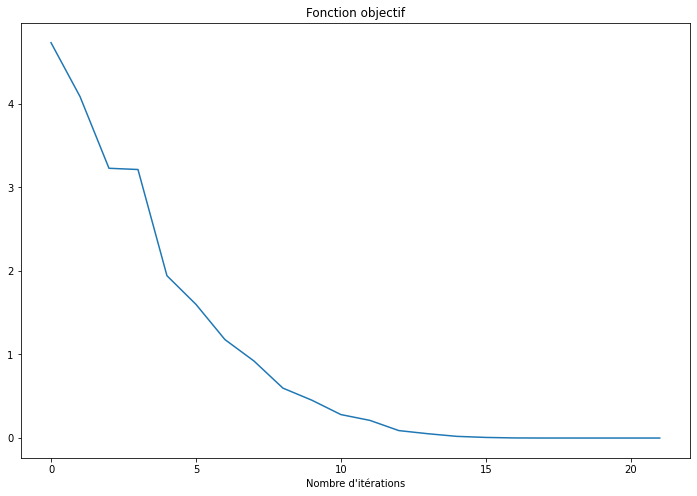

In [33]:
plt.figure(figsize=(12,8))
plt.title("Fonction objectif")
plt.xlabel("Nombre d'itérations")
plt.plot(f_values)

On remarque que la converge avec le critère $ϵ$ est atteint au bout de 44 itérations. Avec la méthode de Newton globalement convergente, il a fallu plus d'itérations qu'avec la version classion pour atteindre le minimum avec le même critère de convergence.

Voici l'évolution de la fonction objectif avec une échelle logarithmique

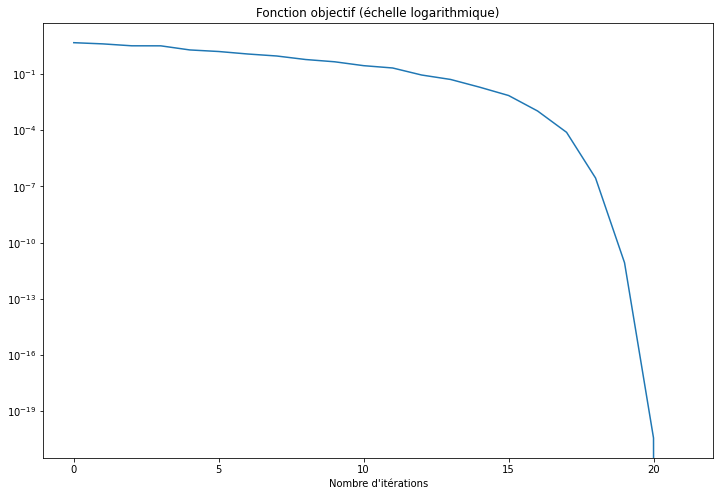

In [34]:
plt.figure(figsize=(12,8))
plt.title("Fonction objectif (échelle logarithmique)")
plt.xlabel("Nombre d'itérations")
plt.plot(f_values)
plt.yscale("log")

***Question 1.4 Try out a few values for c and θ (report the results of your tests). How sensitive does the method appear to be to these values?***

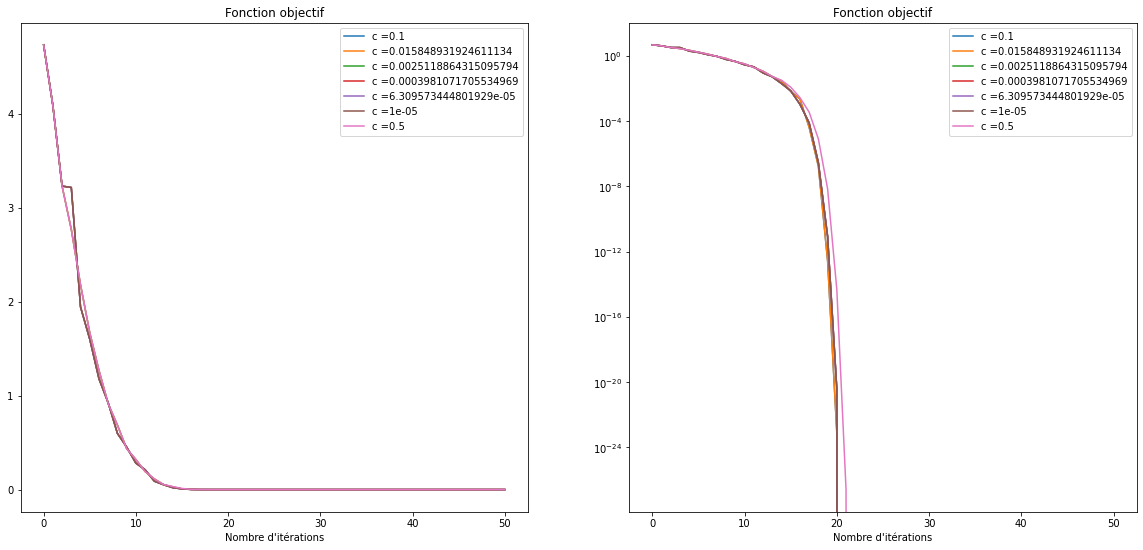

In [35]:
c_values = list(np.logspace(-1,-5,6))
c_values.append(0.5)

plt.figure(figsize=(20,9))
ax = plt.subplot(1,2,1)
for c in c_values:
  w_values, f_values = newton.run(w0,nb_iterations = 50,convergence="nb_iterations",c=c,theta=0.5,verbose=False)
  plt.plot(f_values)

plt.legend(list(map(lambda x:"c =" +str(x),c_values)))
ax.title.set_text("Fonction objectif")
ax.set_xlabel("Nombre d'itérations")

ax = plt.subplot(1,2,2)
for c in c_values:
  w_values, f_values = newton.run(w0,nb_iterations = 50,convergence="nb_iterations",c=c,theta=0.5,verbose=False)
  plt.plot(f_values)

plt.legend(list(map(lambda x:"c =" +str(x),c_values)))
ax.title.set_text("Fonction objectif")
ax.set_xlabel("Nombre d'itérations")
plt.yscale("log")


La méthode ne semble a priori pas très sensible aux variations du paramètre c.
Dans la suite, nous allons faire varier le paramètre $\theta$.

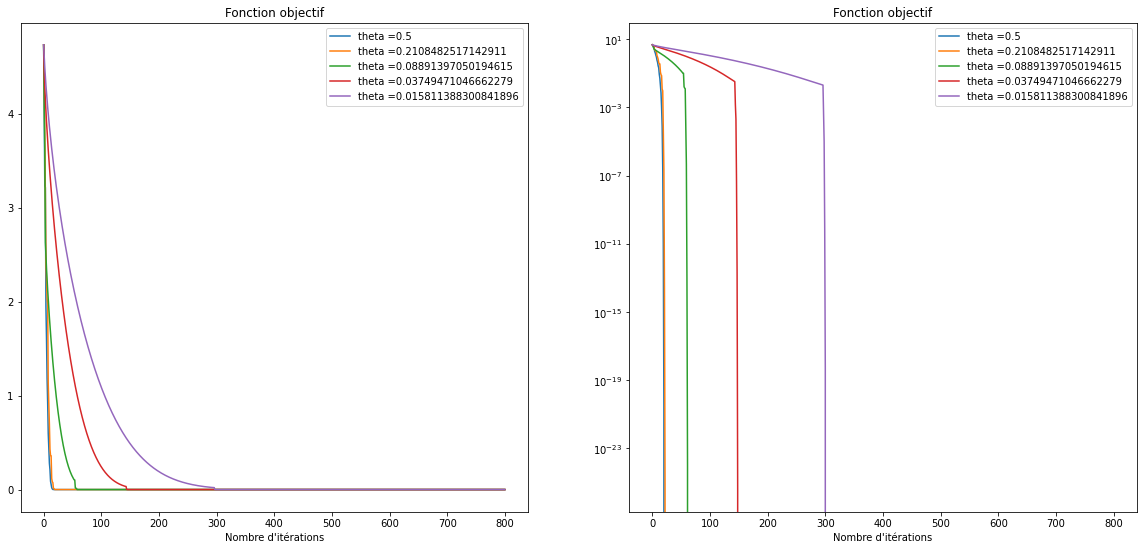

In [36]:
theta_values = 5*np.logspace(-1, -2.5, num=5)
legends = list(map(lambda x:"theta =" +str(x),theta_values))

plt.figure(figsize = (20,9))
res = []
ax = plt.subplot(1,2,1)
for theta in theta_values:
  w_values, f_values = newton.run(w0,nb_iterations = 800,convergence="nb_interations",c=0.0001,theta=theta,verbose=False)
  plt.plot(f_values)
  res.append(f_values)
plt.legend(legends)
ax.title.set_text("Fonction objectif")
ax.set_xlabel("Nombre d'itérations")

ax = plt.subplot(1,2,2)
for f_values in res:
  plt.plot(f_values)
plt.legend(legends)
ax.title.set_text("Fonction objectif")
ax.set_xlabel("Nombre d'itérations")
plt.yscale("log")

On remarque que le nombre d'itération augmente fortement quand $ϴ$ diminue. Le coût en temps de calcul augmente quand $Θ$ augmente.  En effet, plus $Θ$ est faible et plus la recherche linéaire progresse lentement.

### Quasi-Newton methods and BFGS

$$w_{k+1} = w_k − α_kH_k∇f(wk)$$
Où $H_k$ est une matrice symétrique, définie positive, telle que $H_k^{-1} ≈ ∇^2f(w_k)$

***Implementation 1.3 Implement a quasi-Newton method with the BFGS update (9) and Armijo
line search (7).***

In [37]:
class BGFS_Newton(NewtonMethod):
      """
      Quasi-Newton Method - BGFS
      (Broyden, Fletcher, Goldfarb and Shanno).
      """
      def compute_direction(self,grad,Hk): 
        return -Hk @ grad


      def linesearch(self,w,d,c,theta):
          #Calcul du taux d'apprentissage avec une recherche linéaire
          grad, _ = self.compute_gradient_hessian(w)   
          fx = self.f(w)
          alpha = 1        
          while self.f(w+alpha*d) >  fx + c*alpha * d.T @ grad: 
            alpha *= theta      

          return alpha


      def run(self,w0,epsilon=1e-3, alpha0=1,nb_iterations = 50,
              convergence = "epsilon",c = 0.0001, theta = 0.5,verbose=True):
        k = 0
        w = w0

        w_values = []
        f_values = []

        m = len(w0)
        Hk = torch.eye(m,dtype=torch.float64) 
        while True:        
            k += 1
            #compute gradient and hessian matrix at w
            grad, H = self.compute_gradient_hessian(w)

            #compute direction
            d = self.compute_direction(grad,Hk)
            
             #initial value of theta
            alpha = self.linesearch(w,d,c,theta)   

            #update
            w_old = w
            w = w + alpha*d

            #compute Hk
            new_grad, H = self.compute_gradient_hessian(w)
            sk = w - w_old
            vk = new_grad - grad

            vk = vk.resize(m,1)
            sk = sk.resize(m,1)

            if sk.T @ vk > 0:
                M = (vk @ sk.T) / (sk.T @ vk)
                N = (sk @ sk.T) / (sk.T @ vk)
                A = torch.eye(m,dtype=torch.float64) - M
                Hk = A.T @ Hk @ A + N

            w_values.append(w.detach().numpy())
            f_values.append(self.f(w).detach().numpy())

            #convergence 
            if convergence == "epsilon":
              if torch.linalg.norm(grad) < epsilon:
                if verbose:
                  print(f"Convergence en {k} iterations")
                break
            else:
              if k > nb_iterations:
                if verbose:
                  print(f"Arrêt à {k} iterations")
                break

        return w_values,f_values

***Question 1.5 : Compare the quasi-Newton method from Implementation 1.3 and the line-search
Newton method from Implementation 1.1 on problems (3) and (4). Use the same starting points
and the same values for c and θ in the comparison. Illustrate the comparison in terms of***
- Iterations;
- Gradient and Hessian evaluations, assuming the cost of a Hessian matrix is d times that of a
gradient vector;
- Function evaluations

In [38]:
def f_problem3(x):
    return 2*(x[0] + x[1] + x[2] -3)**2 + (x[0] - x[1])**2 + (x[1] - x[2])**2 

def f_problem4(x):
    return 100*(x[1] - x[0]**2)**2 +(1 - x[0])**2 

print("Quasi-Newton")
newton = BGFS_Newton()
newton.define_function(f_problem3)
w0 = torch.tensor(np.array([-4, 3, 1.0]))
w_values, f_values1 = newton.run(w0,convergence="epsilon",c=0.0001,theta=0.5)
print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])
w_values, f_values1 = newton.run(w0,nb_iterations = 10,convergence="nb_iterations",
                                 c=0.0001,theta=0.5,verbose=False)


print("Line-search Newton")
newton = GlobalConvergentNewton()
newton.define_function(f_problem3)
w0 = torch.tensor(np.array([-4, 3, 1.0]))
w_values, f_values2 = newton.run(w0,convergence="epsilon",
                                 c=0.0001,theta=0.5)

print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])
w_values, f_values2 = newton.run(w0,nb_iterations = 10,convergence="nb_iterations",
                                 c=0.0001,theta=0.5,verbose=False)

Quasi-Newton
Convergence en 8 iterations
argmin(f) =  [1.00000017 0.99999987 0.99999987]
min(f) =  0.0
Line-search Newton
Convergence en 2 iterations
argmin(f) =  [1. 1. 1.]
min(f) =  0.0


/home/imaginat0r/.local/lib/python3.8/site-packages/torch/_tensor.py:493: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Text(0.5, 1.0, 'Fonction objectif du problème (3)')

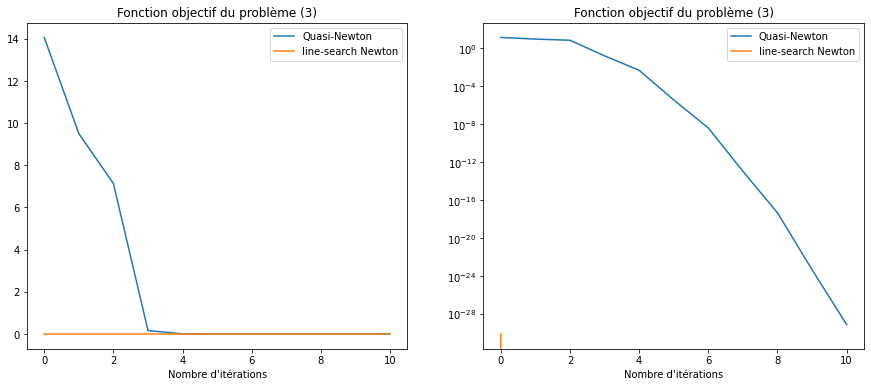

In [39]:
fig = plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1)
plt.plot(f_values1)
plt.plot(f_values2)
plt.legend(["Quasi-Newton", "line-search Newton"])
ax.set_xlabel("Nombre d'itérations")
plt.title("Fonction objectif du problème (3)")



ax = plt.subplot(1,2,2)
plt.plot(f_values1)
plt.plot(f_values2)
plt.yscale("log")
plt.legend(["Quasi-Newton", "line-search Newton"])
ax.set_xlabel("Nombre d'itérations")
plt.title("Fonction objectif du problème (3)")


Quasi-Newton
Convergence en 9 iterations
argmin(f) =  [[0.9999998 ]
 [1.00000001]
 [1.00000015]]
min(f) =  0.0
Line-search Newton
Convergence en 2 iterations
argmin(f) =  [1. 1. 1.]
min(f) =  0.0


Text(0.5, 0, "Nombre d'itérations")

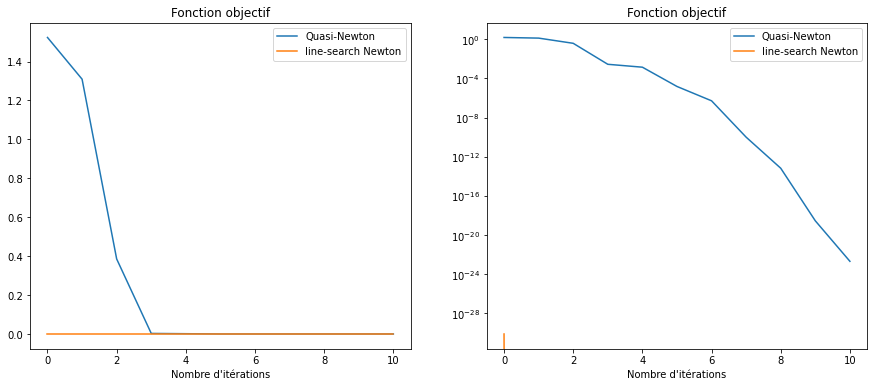

In [40]:
print("Quasi-Newton")
newton = BGFS_Newton()
newton.define_function(f_problem3)
w0 = torch.rand(3, dtype=torch.float64).reshape(3,1)
w_values, f_values1 = newton.run(w0,convergence="epsilon",c=0.0001,theta=0.5)
print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])
w_values, f_values1 = newton.run(w0,nb_iterations = 10,convergence="nb_iterations",
                                 c=0.0001,theta=0.5,verbose=False)


print("Line-search Newton")
newton = GlobalConvergentNewton()
newton.define_function(f_problem3)
w0 = torch.tensor(np.array([-4, 3, 1.0]))
w_values, f_values2 = newton.run(w0,convergence="epsilon",
                                 c=0.0001,theta=0.5)

print("argmin(f) = ", w_values[-1])
print("min(f) = ",f_values[-1])
w_values, f_values2 = newton.run(w0,nb_iterations = 10,convergence="nb_iterations",
                                 c=0.0001,theta=0.5,verbose=False)

plt.figure(figsize=(15,6))
ax = plt.subplot(1,2,1)
plt.plot(f_values1)
plt.plot(f_values2)
plt.legend(["Quasi-Newton", "line-search Newton"])
ax.title.set_text("Fonction objectif")
ax.set_xlabel("Nombre d'itérations")


ax = plt.subplot(1,2,2)
plt.plot(f_values1)
plt.plot(f_values2)
plt.yscale("log")
plt.legend(["Quasi-Newton", "line-search Newton"])
ax.title.set_text("Fonction objectif")
ax.set_xlabel("Nombre d'itérations")

Soit $w$ $\in$ $R^d$,

- Evaluations de gradient et de la matrice hessienne par itération:
  - **Quasi-Newton** : 2 évaluations de gradient (en $w_k$ et en $w_{k+1}$) + 0 évaluation de hessienne = *2 évaluations de gradient*
  - **Line-search Newton** : 1 évaluation de gradient + 1 évaluation de hessienne = *1+d évaluation de gradient*


- Evaluations de fonction par itération: 
  - **Quasi-Newton** : $1 + k$ où $k$ est le nombre d'itérations de la recherche linéaire 
  - **Line-search Newton** : $1 + k$ où $k$ est le nombre d'itérations de la recherche linéaire 

### Limited-memory BFGS (L-BFGS)

***Implementation 1.4 Implement a quasi-Newton method with the L-BFGS update described by
Algorithm 1 and Armijo line search (7).***

In [41]:
class L_BGFS_Newton(BGFS_Newton):

      def L_BFGS_update(self,memory_size,pairs,m):  
        if len(pairs) >= memory_size:
            l = max(0,memory_size-1)
        else:
            l = 0
        Hk = torch.eye(m,dtype=torch.float64)  

        for i in range(0,l):
          sk,vk = pairs[i]

          vk = vk.reshape(m,1)
          sk = sk.reshape(m,1)

          if sk.T @ vk > 0:
            M = (vk @ sk.T)/ (sk.T @ vk)
            N = (sk @ sk.T)/ (sk.T @ vk)
            A = torch.eye(m,dtype=torch.float64) - M
            Hk = A.T @ Hk @ A + N
        return Hk
      

      def run(self,w0,epsilon=1e-4, memory_size = 5,nb_iterations = 50,
                convergence="epsilon",
                c = 0.0001,
                theta = 0.5):
        k = 0
        w = w0
        w_values = []
        f_values = []
        pairs = []

        m = len(w0)
        Hk = torch.eye(m,dtype=torch.float64) 
        while True:        
            k += 1

            #compute gradient and hessian matrix at w
            grad, H = self.compute_gradient_hessian(w)

            #compute direction
            d = self.compute_direction(grad,Hk)

            #linesearch and update of w            
            alpha = self.linesearch(w,d,c,theta)    

            #update
            w_old = w
            w = w + alpha*d

            #compute Hk
            new_grad, H = self.compute_gradient_hessian(w)
            sk = w - w_old
            vk = new_grad - grad

            pairs.append((sk,vk))

            if len(pairs) > memory_size:
              pairs.pop(0)

            Hk = self.L_BFGS_update(memory_size,pairs,m)

            w_values.append(w.detach().numpy())
            f_values.append(self.f(w).detach().numpy())

            if convergence == "epsilon":
              if torch.linalg.norm(grad) < epsilon:
                print(f"Convergence en {k} iterations")
                break
            else:
              if k > nb_iterations:
                print(f"Arrêt à {k} iterations")
                break

        return w_values,f_values

***Question 1.6 Run BFGS and three variants of L-BFGS respectively using m = 0, m = 1 and m = 5
on the Rosenbrock function (4), and compare the results. What metric could show the computational
interest of limited memory quasi-Newton? Do you observe this improvement here?***

Arrêt à 81 iterations
Arrêt à 81 iterations
Arrêt à 81 iterations
Arrêt à 81 iterations
Arrêt à 81 iterations
Arrêt à 81 iterations


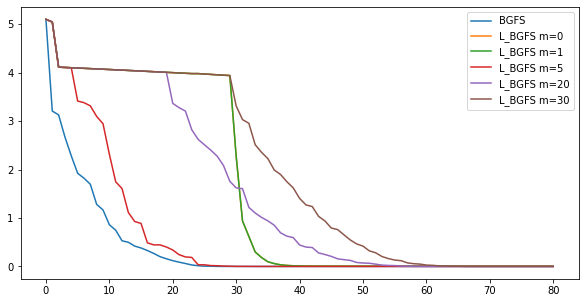

In [42]:
newtonBGFS = BGFS_Newton()
newtonL_BGFS = L_BGFS_Newton()
def f(x):
    return 100*(x[1] - x[0]**2)**2 +(1 - x[0])**2 
newtonBGFS.define_function(f)
newtonL_BGFS.define_function(f)

plt.figure(figsize=(10,5))
w0 = torch.tensor(np.array([-1.2, 1]), dtype=torch.float64, requires_grad=True)
w_values, f_values = newtonBGFS.run(w0,alpha0=1,convergence="nb_iterations",nb_iterations=80)
plt.plot(f_values)

for m in [0,1,5,20,30]:
  w_values0, f_values = newtonL_BGFS.run(w0,memory_size=m,convergence="nb_iterations",nb_iterations=80)
  plt.plot(f_values)
plt.legend(["BGFS", "L_BGFS m=0","L_BGFS m=1","L_BGFS m=5","L_BGFS m=20","L_BGFS m=30"])

On remarque que la méthode BGFS converge plus vite que les méthodes L_BGFS. La méthode BGFS donne une estimée plus précise de la matrice hessienne que les méthodes à mémoire limitée. Cette méthode est ainsi similaire au gradient stochastique.
Plus la taille de la mémoire diminue, plus la méthode converge lentement car l'estimation de la matrice hessienne est de moins en moins précise.

La méthode L-BFGS est avantageuse dans le cas de problèmes avec beaucoup de paramètres. En effet, elle ne nécessite pas de stocker la matrice hessienne de l'itération précédente mais seulement les $m$ valeurs de $s$ et $v$. Le coût en stockage passe de $O(n^2)$ (stockage de $H_t$) à $O(mn)$.

Une mesure de la mémoire ocupée par l'algorithme L-BFGS permetterait de montrer l'avantage computationnelle de cette méthode.